In [54]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [55]:
happiness = pd.read_csv('C:\\Users\\micha\\Downloads\\world-happiness\\happiness.csv')
happiness.head(2)

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,7.600,1.383,1.573,0.996,0.592,0.252,0.410


In [56]:
#Preparing the data
happiness.describe()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [57]:
# splitting target (response) variable from input variables
target = happiness.Score

inputs = happiness.drop('Score', axis=1) 

In [58]:
results = train_test_split(inputs, target, test_size = 0.2, random_state = 1) #test size is 20% -- common to use this - if I had more data, I'd use a lower %

In [59]:
#getting an idea of what the data looks like

print(type(results))
print(len(results))
print('----') #spacer for readability
for item in results: 
    print(item.shape)

<class 'list'>
4
----
(124, 6)
(32, 6)
(124,)
(32,)


In [60]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipelines = {
    'lasso' : make_pipeline(StandardScaler(), Lasso(random_state=1)),
    'ridge' : make_pipeline(StandardScaler(), Ridge(random_state=1))
}

In [61]:
input_train, input_test, target_train, target_test = results
print(input_train.shape)
print(input_test.shape)
print(target_train.shape)
print(target_test.shape)

(124, 6)
(32, 6)
(124,)
(32,)


In [62]:
# dict_name['key name'] = value

from sklearn.linear_model import ElasticNet

pipelines['enet'] = make_pipeline(StandardScaler(), ElasticNet(random_state=1))

In [63]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

pipelines['rf'] = make_pipeline(StandardScaler(), RandomForestRegressor(random_state=1))
pipelines['gb'] = make_pipeline(StandardScaler(), GradientBoostingRegressor(random_state=1))

In [64]:
for key, value in pipelines.items():
    print(key, type(value))

lasso <class 'sklearn.pipeline.Pipeline'>
ridge <class 'sklearn.pipeline.Pipeline'>
enet <class 'sklearn.pipeline.Pipeline'>
rf <class 'sklearn.pipeline.Pipeline'>
gb <class 'sklearn.pipeline.Pipeline'>


In [65]:
#hyperparameters control the amount of regularization (helps prevent overfitting)
#One question is that this happiness model is prone to underfitting, so reduce the regularization hyperparameters? 

lasso_hyperparameters = {
    'lasso__alpha' : [0.01, 0.05, 0.1, 0.5, 1, 5]
}

In [66]:
ridge_hyperparameters = {
    'ridge__alpha' : [0.01, 0.05, 0.1, 1, 5]
}

enet_hyperparameters = {
    'elasticnet__alpha' : [0.01, 0.05, 0.1, 1, 5],
    'elasticnet__l1_ratio' : [0.1, 0.3, 0.5, 0.7, 0.9]
}

In [67]:
rf_hyperparameters = {
    'randomforestregressor__n_estimators' : [100, 200],
    'randomforestregressor__max_features' : ['auto', 0.3, 0.6]
}

gb_hyperparameters = {
    'gradientboostingregressor__n_estimators' : [100, 200],
    'gradientboostingregressor__learning_rate' : [0.05, 0.1, 0.2],
    'gradientboostingregressor__max_depth' : [1, 3, 5]
}

In [68]:
hyperparameter_grids = {
    'lasso' : lasso_hyperparameters,
    'ridge' : ridge_hyperparameters,
    'enet' : enet_hyperparameters,
    'rf' : rf_hyperparameters,
    'gb' : gb_hyperparameters
}

In [69]:
# following code is for testing to see if grids are set up correctly

for key in ['enet', 'gb', 'ridge', 'rf', 'lasso']: 
    if key in hyperparameter_grids: 
        if type(hyperparameter_grids[key]) is dict: 
            print(key, 'was found, and it is a grid.')
        else:
            print(key, 'was not, but it is not a grid')
    else: 
        print(key, 'was not found')

enet was found, and it is a grid.
gb was found, and it is a grid.
ridge was found, and it is a grid.
rf was found, and it is a grid.
lasso was found, and it is a grid.


In [70]:
#cv is cross-validation - cv = 5 is number of cv to do
from sklearn.model_selection import GridSearchCV

untrained_lasso_model = GridSearchCV(pipelines['lasso'], hyperparameter_grids['lasso'], cv=5)

In [71]:
models = {}

for key in pipelines.keys():
    models[key] = GridSearchCV(pipelines[key], hyperparameter_grids[key], cv=5)
    
models.keys()    #validate that function was done correctly - should match keys above (pipeline and hyperparameter)

dict_keys(['lasso', 'ridge', 'enet', 'rf', 'gb'])

In [72]:
models['lasso'].fit(input_train, target_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lasso', Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=1,
   selection='cyclic', tol=0.0001, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'lasso__alpha': [0.01, 0.05, 0.1, 0.5, 1, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [73]:
#training the models
for key in models.keys():
    models[key].fit(input_train, target_train)
    print(key, 'is trained and tuned.')

lasso is trained and tuned.
ridge is trained and tuned.
enet is trained and tuned.
rf is trained and tuned.
gb is trained and tuned.


In [74]:
from sklearn.metrics import r2_score, mean_absolute_error

In [75]:
# Taking each model's R2 and MAE to see which has best fit
for key in models:
    preds = models[key].predict(input_test)
    print(key)
    print('R-Squared: ', round(r2_score(target_test, preds), 3))
    print('MAE: ', round(mean_absolute_error(target_test, preds), 3))
    print('----')

lasso
R-Squared:  0.819
MAE:  0.357
----
ridge
R-Squared:  0.829
MAE:  0.342
----
enet
R-Squared:  0.825
MAE:  0.347
----
rf
R-Squared:  0.799
MAE:  0.342
----
gb
R-Squared:  0.832
MAE:  0.332
----


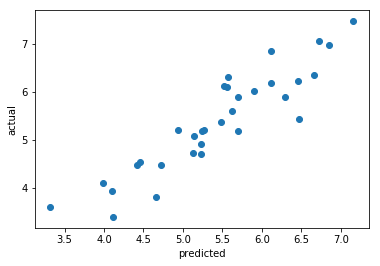

In [76]:
# Based on results above, I use gb because it has the highest R2 and lowest MAE
# Making predictions with the test data
preds = models['gb'].predict(input_test)

# Plotting predictions on x axis and actual data on y axis
plt.scatter(preds, target_test)

# Labeling axes and showing the graph
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

In [84]:
country_happy = pd.read_csv('C:\\Users\\micha\\Downloads\\world-happiness\\score_country.csv')
models['gb'].predict(country_happy) #output is prediction of happiness score

array([5.42483543])